In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/CNN/sentiment140_vader4_sinlematizar.csv')
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing
...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X = df['preprocesado_sinlematizar']
y = df['label']

# Primero dividimos en entrenamiento (80%) y prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Luego dividimos el conjunto temporal en entrenamiento (80% de 80%) y validación (20% de 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=34, stratify=y_temp)


In [ ]:
import numpy as np
embedding_matrix_x_train= np.load('/content/drive/MyDrive/embeddings_matrix_validation.npy')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Configuración de Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.astype(str))
sequences = tokenizer.texts_to_sequences(X_train.astype(str))

max_length=25
X_train_def = pad_sequences(sequences, maxlen=max_length, padding='post')


embedding_dim = 400
word_index = tokenizer.word_index
num_words = len(word_index) + 1

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Convertir X_val a secuencias numéricas
sequences_val = tokenizer.texts_to_sequences(X_val.astype(str))  # Convertir a secuencias
X_val_def = pad_sequences(sequences_val, maxlen=max_length, padding='post')  # Asegurar la longitud adecuada


In [ ]:
len(X_test_def[0])

25

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7412 - loss: 0.4969 - val_accuracy: 0.8317 - val_loss: 0.3728
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8319 - loss: 0.3719 - val_accuracy: 0.8430 - val_loss: 0.3523
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8508 - loss: 0.3349 - val_accuracy: 0.8443 - val_loss: 0.3468
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8614 - loss: 0.3115 - val_accuracy: 0.8438 - val_loss: 0.3556
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8724 - loss: 0.2915 - val_accuracy: 0.8436 - val_loss: 0.3556
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8831 - loss: 0.2689 - val_accuracy: 0.8417 - val_loss: 0.3634


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8450 - loss: 0.3420
Pérdida en el conjunto de test: 0.34704089164733887
Precisión en el conjunto de test: 0.8431939482688904


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7269 - loss: 0.5171 - val_accuracy: 0.8318 - val_loss: 0.3745
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8214 - loss: 0.3887 - val_accuracy: 0.8399 - val_loss: 0.3562
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8334 - loss: 0.3635 - val_accuracy: 0.8428 - val_loss: 0.3495
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8410 - loss: 0.3482 - val_accuracy: 0.8405 - val_loss: 0.3521
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8507 - loss: 0.3325 - val_accuracy: 0.8442 - val_loss: 0.3446
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8557 - loss: 0.3235 - val_accuracy: 0.8453 - val_loss: 0.3443
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8613 - loss: 0.3128 - val_accuracy: 0.8436 - val_loss: 0.3466
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8641 - loss: 0.3

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3446
Pérdida en el conjunto de test: 0.3474033772945404
Precisión en el conjunto de test: 0.8466619849205017


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64, 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7304 - loss: 0.5091 - val_accuracy: 0.8291 - val_loss: 0.3767
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8210 - loss: 0.3884 - val_accuracy: 0.8382 - val_loss: 0.3593
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8384 - loss: 0.3579 - val_accuracy: 0.8416 - val_loss: 0.3519
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8470 - loss: 0.3398 - val_accuracy: 0.8432 - val_loss: 0.3494
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8586 - loss: 0.3193 - val_accuracy: 0.8451 - val_loss: 0.3447
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8639 - loss: 0.3074 - val_accuracy: 0.8437 - val_loss: 0.3511
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8691 - loss: 0.2958 - val_accuracy: 0.8439 - val_loss: 0.3505
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8757 - loss: 0.28

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8483 - loss: 0.3476
Pérdida en el conjunto de test: 0.35304948687553406
Precisión en el conjunto de test: 0.8463317155838013


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7445 - loss: 0.4985 - val_accuracy: 0.8371 - val_loss: 0.3690
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8266 - loss: 0.3811 - val_accuracy: 0.8431 - val_loss: 0.3518
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8404 - loss: 0.3507 - val_accuracy: 0.8455 - val_loss: 0.3465
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8526 - loss: 0.3320 - val_accuracy: 0.8461 - val_loss: 0.3448
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8635 - loss: 0.3098 - val_accuracy: 0.8476 - val_loss: 0.3416
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8676 - loss: 0.2958 - val_accuracy: 0.8468 - val_loss: 0.3472
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8768 - loss: 0.2833 - val_accuracy: 0.8470 - val_loss: 0.3484
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8831 - loss: 0.

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.3373
Pérdida en el conjunto de test: 0.3408348262310028
Precisión en el conjunto de test: 0.8444737792015076


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128, 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7480 - loss: 0.4956 - val_accuracy: 0.8275 - val_loss: 0.3773
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8257 - loss: 0.3825 - val_accuracy: 0.8322 - val_loss: 0.3691
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8429 - loss: 0.3463 - val_accuracy: 0.8397 - val_loss: 0.3579
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8569 - loss: 0.3201 - val_accuracy: 0.8382 - val_loss: 0.3578
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8703 - loss: 0.2952 - val_accuracy: 0.8422 - val_loss: 0.3571
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8779 - loss: 0.2760 - val_accuracy: 0.8373 - val_loss: 0.3651
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8887 - loss: 0.2606 - val_accuracy: 0.8399 - val_loss: 0.3649
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8951 - loss: 0.244

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.3525
Pérdida en el conjunto de test: 0.35596805810928345
Precisión en el conjunto de test: 0.8400974273681641


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128, 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7312 - loss: 0.5133 - val_accuracy: 0.8277 - val_loss: 0.3789
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8174 - loss: 0.3968 - val_accuracy: 0.8387 - val_loss: 0.3591
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8305 - loss: 0.3690 - val_accuracy: 0.8439 - val_loss: 0.3479
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8419 - loss: 0.3508 - val_accuracy: 0.8401 - val_loss: 0.3503
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8495 - loss: 0.3350 - val_accuracy: 0.8462 - val_loss: 0.3433
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8546 - loss: 0.3221 - val_accuracy: 0.8465 - val_loss: 0.3419
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8618 - loss: 0.3094 - val_accuracy: 0.8472 - val_loss: 0.3414
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8681 - loss: 0.30

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.3406
Pérdida en el conjunto de test: 0.3446536660194397
Precisión en el conjunto de test: 0.8469922542572021


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7090 - loss: 0.5405 - val_accuracy: 0.8304 - val_loss: 0.3785
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8117 - loss: 0.4036 - val_accuracy: 0.8379 - val_loss: 0.3634
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8252 - loss: 0.3805 - val_accuracy: 0.8425 - val_loss: 0.3545
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8303 - loss: 0.3701 - val_accuracy: 0.8447 - val_loss: 0.3505
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8374 - loss: 0.3587 - val_accuracy: 0.8443 - val_loss: 0.3475
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8435 - loss: 0.3465 - val_accuracy: 0.8472 - val_loss: 0.3431
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8420 - loss: 0.3461 - val_accuracy: 0.8492 - val_loss: 0.3405
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8464 - loss: 0.34

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.3356
Pérdida en el conjunto de test: 0.34087908267974854
Precisión en el conjunto de test: 0.8448041081428528


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6979 - loss: 0.5896 - val_accuracy: 0.8248 - val_loss: 0.3877
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8095 - loss: 0.4093 - val_accuracy: 0.8358 - val_loss: 0.3656
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8275 - loss: 0.3785 - val_accuracy: 0.8393 - val_loss: 0.3574
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8354 - loss: 0.3615 - val_accuracy: 0.8375 - val_loss: 0.3570
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8457 - loss: 0.3445 - val_accuracy: 0.8443 - val_loss: 0.3506
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8462 - loss: 0.3346 - val_accuracy: 0.8413 - val_loss: 0.3512
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8549 - loss: 0.3226 - val_accuracy: 0.8418 - val_loss: 0.3597
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8596 - loss: 0.312

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.3472
Pérdida en el conjunto de test: 0.3498431444168091
Precisión en el conjunto de test: 0.8431939482688904


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7112 - loss: 0.5338 - val_accuracy: 0.8305 - val_loss: 0.3769
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8259 - loss: 0.3864 - val_accuracy: 0.8396 - val_loss: 0.3576
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8402 - loss: 0.3562 - val_accuracy: 0.8390 - val_loss: 0.3527
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8493 - loss: 0.3362 - val_accuracy: 0.8406 - val_loss: 0.3558
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8578 - loss: 0.3175 - val_accuracy: 0.8444 - val_loss: 0.3554
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8681 - loss: 0.3004 - val_accuracy: 0.8407 - val_loss: 0.3661
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8751 - loss: 0.2846 - val_accuracy: 0.8409 - val_loss: 0.3665
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8806 - loss: 0.27

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8464 - loss: 0.3485
Pérdida en el conjunto de test: 0.3542924225330353
Precisión en el conjunto de test: 0.8429462313652039


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7251 - loss: 0.5186 - val_accuracy: 0.8308 - val_loss: 0.3773
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8169 - loss: 0.3955 - val_accuracy: 0.8385 - val_loss: 0.3586
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8308 - loss: 0.3711 - val_accuracy: 0.8411 - val_loss: 0.3508
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8395 - loss: 0.3543 - val_accuracy: 0.8442 - val_loss: 0.3457
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8467 - loss: 0.3425 - val_accuracy: 0.8467 - val_loss: 0.3401
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8516 - loss: 0.3313 - val_accuracy: 0.8453 - val_loss: 0.3405
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8553 - loss: 0.3225 - val_accuracy: 0.8454 - val_loss: 0.3382
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8608 - loss: 0.314

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8494 - loss: 0.3312
Pérdida en el conjunto de test: 0.3365821838378906
Precisión en el conjunto de test: 0.8490979075431824


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(256 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7356 - loss: 0.5083 - val_accuracy: 0.8308 - val_loss: 0.3748
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8242 - loss: 0.3858 - val_accuracy: 0.8417 - val_loss: 0.3547
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8388 - loss: 0.3583 - val_accuracy: 0.8425 - val_loss: 0.3492
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8442 - loss: 0.3397 - val_accuracy: 0.8423 - val_loss: 0.3495
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8565 - loss: 0.3224 - val_accuracy: 0.8477 - val_loss: 0.3388
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8633 - loss: 0.3064 - val_accuracy: 0.8463 - val_loss: 0.3433
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8712 - loss: 0.2945 - val_accuracy: 0.8489 - val_loss: 0.3430
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8752 - loss: 0.2839

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3394
Pérdida en el conjunto de test: 0.34482666850090027
Precisión en el conjunto de test: 0.8486437201499939


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7157 - loss: 0.5291 - val_accuracy: 0.8245 - val_loss: 0.3864
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8110 - loss: 0.4068 - val_accuracy: 0.8385 - val_loss: 0.3650
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8255 - loss: 0.3790 - val_accuracy: 0.8400 - val_loss: 0.3573
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8321 - loss: 0.3675 - val_accuracy: 0.8375 - val_loss: 0.3558
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8406 - loss: 0.3534 - val_accuracy: 0.8434 - val_loss: 0.3478
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8457 - loss: 0.3430 - val_accuracy: 0.8451 - val_loss: 0.3452
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8507 - loss: 0.3379 - val_accuracy: 0.8438 - val_loss: 0.3446
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8534 - loss: 0.3284

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8497 - loss: 0.3371
Pérdida en el conjunto de test: 0.34101879596710205
Precisión en el conjunto de test: 0.8480657339096069


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(256 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7391 - loss: 0.5040 - val_accuracy: 0.8250 - val_loss: 0.3811
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8205 - loss: 0.3924 - val_accuracy: 0.8336 - val_loss: 0.3632
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8359 - loss: 0.3595 - val_accuracy: 0.8444 - val_loss: 0.3506
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8470 - loss: 0.3372 - val_accuracy: 0.8369 - val_loss: 0.3603
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8602 - loss: 0.3138 - val_accuracy: 0.8439 - val_loss: 0.3480
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8687 - loss: 0.2951 - val_accuracy: 0.8406 - val_loss: 0.3580


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3468
Pérdida en el conjunto de test: 0.35312244296073914
Precisión en el conjunto de test: 0.8413360118865967


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6962 - loss: 0.5555 - val_accuracy: 0.8243 - val_loss: 0.3918
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8097 - loss: 0.4114 - val_accuracy: 0.8391 - val_loss: 0.3668
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8234 - loss: 0.3855 - val_accuracy: 0.8426 - val_loss: 0.3576
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8325 - loss: 0.3709 - val_accuracy: 0.8440 - val_loss: 0.3523
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8389 - loss: 0.3582 - val_accuracy: 0.8457 - val_loss: 0.3488
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8415 - loss: 0.3511 - val_accuracy: 0.8480 - val_loss: 0.3421
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8476 - loss: 0.3434 - val_accuracy: 0.8477 - val_loss: 0.3407
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8520 - loss: 0.3354

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3318
Pérdida en el conjunto de test: 0.3342164158821106
Precisión en el conjunto de test: 0.8517402410507202


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7195 - loss: 0.5200 - val_accuracy: 0.8262 - val_loss: 0.3791
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8273 - loss: 0.3803 - val_accuracy: 0.8384 - val_loss: 0.3535
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8459 - loss: 0.3422 - val_accuracy: 0.8462 - val_loss: 0.3455
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8576 - loss: 0.3197 - val_accuracy: 0.8462 - val_loss: 0.3448
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8705 - loss: 0.2970 - val_accuracy: 0.8470 - val_loss: 0.3491
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8795 - loss: 0.2788 - val_accuracy: 0.8461 - val_loss: 0.3562
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8831 - loss: 0.2670 - val_accuracy: 0.8424 - val_loss: 0.3729
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8927 - loss: 0.2515 

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.3476
Pérdida en el conjunto de test: 0.35151219367980957
Precisión en el conjunto de test: 0.8450930714607239


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7134 - loss: 0.5305 - val_accuracy: 0.8246 - val_loss: 0.3847
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8122 - loss: 0.4024 - val_accuracy: 0.8346 - val_loss: 0.3659
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8305 - loss: 0.3728 - val_accuracy: 0.8450 - val_loss: 0.3524
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8392 - loss: 0.3562 - val_accuracy: 0.8460 - val_loss: 0.3433
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8489 - loss: 0.3400 - val_accuracy: 0.8479 - val_loss: 0.3388
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8536 - loss: 0.3305 - val_accuracy: 0.8483 - val_loss: 0.3364
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8549 - loss: 0.3239 - val_accuracy: 0.8480 - val_loss: 0.3359
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8626 - loss: 0.3

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3247
Pérdida en el conjunto de test: 0.3301675617694855
Precisión en el conjunto de test: 0.854960560798645


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(256 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(256 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7291 - loss: 0.5176 - val_accuracy: 0.8282 - val_loss: 0.3788
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.8195 - loss: 0.3914 - val_accuracy: 0.8399 - val_loss: 0.3586
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8341 - loss: 0.3627 - val_accuracy: 0.8401 - val_loss: 0.3558
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8461 - loss: 0.3413 - val_accuracy: 0.8495 - val_loss: 0.3383
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8562 - loss: 0.3228 - val_accuracy: 0.8522 - val_loss: 0.3349
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8650 - loss: 0.3055 - val_accuracy: 0.8492 - val_loss: 0.3329
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8716 - loss: 0.2927 - val_accuracy: 0.8537 - val_loss: 0.3305
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8767 - loss: 0.2

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8547 - loss: 0.3272
Pérdida en el conjunto de test: 0.3297746777534485
Precisión en el conjunto de test: 0.8545889854431152


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6729 - loss: 0.5734 - val_accuracy: 0.8286 - val_loss: 0.3906
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8098 - loss: 0.4133 - val_accuracy: 0.8383 - val_loss: 0.3695
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8198 - loss: 0.3916 - val_accuracy: 0.8420 - val_loss: 0.3601
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8277 - loss: 0.3793 - val_accuracy: 0.8415 - val_loss: 0.3525
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8337 - loss: 0.3702 - val_accuracy: 0.8433 - val_loss: 0.3485
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8371 - loss: 0.3628 - val_accuracy: 0.8462 - val_loss: 0.3430
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8400 - loss: 0.3562 - val_accuracy: 0.8472 - val_loss: 0.3421
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8416 - loss: 0.354

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8535 - loss: 0.3296
Pérdida en el conjunto de test: 0.33304736018180847
Precisión en el conjunto de test: 0.8510796427726746


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.7177 - loss: 0.5289 - val_accuracy: 0.8331 - val_loss: 0.3774
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8212 - loss: 0.3909 - val_accuracy: 0.8417 - val_loss: 0.3534
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8345 - loss: 0.3649 - val_accuracy: 0.8428 - val_loss: 0.3459
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8404 - loss: 0.3502 - val_accuracy: 0.8461 - val_loss: 0.3413
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8487 - loss: 0.3372 - val_accuracy: 0.8506 - val_loss: 0.3352
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8538 - loss: 0.3280 - val_accuracy: 0.8502 - val_loss: 0.3335
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8591 - loss: 0.3201 - val_accuracy: 0.8528 - val_loss: 0.3320
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8609 - loss: 0.3137

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3236
Pérdida en el conjunto de test: 0.3275980055332184
Precisión en el conjunto de test: 0.8561165928840637


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7041 - loss: 0.5422 - val_accuracy: 0.8320 - val_loss: 0.3794
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8163 - loss: 0.4000 - val_accuracy: 0.8413 - val_loss: 0.3602
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8287 - loss: 0.3757 - val_accuracy: 0.8456 - val_loss: 0.3490
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8365 - loss: 0.3600 - val_accuracy: 0.8474 - val_loss: 0.3432
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8445 - loss: 0.3477 - val_accuracy: 0.8531 - val_loss: 0.3346
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8472 - loss: 0.3402 - val_accuracy: 0.8520 - val_loss: 0.3323
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8518 - loss: 0.3313 - val_accuracy: 0.8534 - val_loss: 0.3281
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8554 - loss: 0.3263

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3203
Pérdida en el conjunto de test: 0.3221507966518402
Precisión en el conjunto de test: 0.8569836020469666


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7261 - loss: 0.5171 - val_accuracy: 0.8260 - val_loss: 0.3806
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8235 - loss: 0.3891 - val_accuracy: 0.8375 - val_loss: 0.3596
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8356 - loss: 0.3610 - val_accuracy: 0.8430 - val_loss: 0.3470
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8471 - loss: 0.3428 - val_accuracy: 0.8471 - val_loss: 0.3376
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8535 - loss: 0.3285 - val_accuracy: 0.8494 - val_loss: 0.3357
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8597 - loss: 0.3141 - val_accuracy: 0.8488 - val_loss: 0.3358
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8673 - loss: 0.3062 - val_accuracy: 0.8513 - val_loss: 0.3321
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8715 - loss: 0.2

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3365
Pérdida en el conjunto de test: 0.33924025297164917
Precisión en el conjunto de test: 0.8487263321876526


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7398 - loss: 0.5020 - val_accuracy: 0.8350 - val_loss: 0.3699
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8258 - loss: 0.3803 - val_accuracy: 0.8382 - val_loss: 0.3585
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8428 - loss: 0.3466 - val_accuracy: 0.8442 - val_loss: 0.3465
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8538 - loss: 0.3262 - val_accuracy: 0.8489 - val_loss: 0.3390
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8665 - loss: 0.3052 - val_accuracy: 0.8494 - val_loss: 0.3370
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8759 - loss: 0.2874 - val_accuracy: 0.8477 - val_loss: 0.3380
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8816 - loss: 0.2744 - val_accuracy: 0.8460 - val_loss: 0.3467
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8873 - loss: 0.26

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8508 - loss: 0.3358
Pérdida en el conjunto de test: 0.34094780683517456
Precisión en el conjunto de test: 0.8493868708610535


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7066 - loss: 0.5399 - val_accuracy: 0.8298 - val_loss: 0.3812
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8199 - loss: 0.3939 - val_accuracy: 0.8398 - val_loss: 0.3559
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8317 - loss: 0.3698 - val_accuracy: 0.8436 - val_loss: 0.3466
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8397 - loss: 0.3556 - val_accuracy: 0.8457 - val_loss: 0.3413
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8475 - loss: 0.3415 - val_accuracy: 0.8474 - val_loss: 0.3374
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8510 - loss: 0.3340 - val_accuracy: 0.8490 - val_loss: 0.3346
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8579 - loss: 0.3225 - val_accuracy: 0.8476 - val_loss: 0.3344
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8586 - loss: 0.318

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3212
Pérdida en el conjunto de test: 0.3254895806312561
Precisión en el conjunto de test: 0.8545889854431152


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7088 - loss: 0.5357 - val_accuracy: 0.8284 - val_loss: 0.3813
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8210 - loss: 0.3936 - val_accuracy: 0.8407 - val_loss: 0.3561
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8319 - loss: 0.3690 - val_accuracy: 0.8438 - val_loss: 0.3459
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8415 - loss: 0.3532 - val_accuracy: 0.8457 - val_loss: 0.3426
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8480 - loss: 0.3413 - val_accuracy: 0.8469 - val_loss: 0.3382
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8525 - loss: 0.3329 - val_accuracy: 0.8512 - val_loss: 0.3358
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8563 - loss: 0.3231 - val_accuracy: 0.8515 - val_loss: 0.3336
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8626 - loss: 0.315

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3269
Pérdida en el conjunto de test: 0.3314342796802521
Precisión en el conjunto de test: 0.853887140750885


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7120 - loss: 0.5289 - val_accuracy: 0.8325 - val_loss: 0.3745
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8226 - loss: 0.3902 - val_accuracy: 0.8422 - val_loss: 0.3514
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8329 - loss: 0.3678 - val_accuracy: 0.8453 - val_loss: 0.3451
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8419 - loss: 0.3513 - val_accuracy: 0.8488 - val_loss: 0.3390
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8474 - loss: 0.3402 - val_accuracy: 0.8463 - val_loss: 0.3372
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8516 - loss: 0.3291 - val_accuracy: 0.8486 - val_loss: 0.3350
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8571 - loss: 0.3233 - val_accuracy: 0.8496 - val_loss: 0.3323
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8607 - loss: 0.314

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3275
Pérdida en el conjunto de test: 0.3302000164985657
Precisión en el conjunto de test: 0.8514925241470337


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7324 - loss: 0.5057 - val_accuracy: 0.8365 - val_loss: 0.3659
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8283 - loss: 0.3804 - val_accuracy: 0.8457 - val_loss: 0.3480
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8408 - loss: 0.3498 - val_accuracy: 0.8505 - val_loss: 0.3348
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8534 - loss: 0.3306 - val_accuracy: 0.8511 - val_loss: 0.3291
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8595 - loss: 0.3177 - val_accuracy: 0.8535 - val_loss: 0.3294
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8628 - loss: 0.3071 - val_accuracy: 0.8558 - val_loss: 0.3251
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8707 - loss: 0.2925 - val_accuracy: 0.8575 - val_loss: 0.3255
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8756 - loss: 0.2

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8554 - loss: 0.3246
Pérdida en el conjunto de test: 0.3276144564151764
Precisión en el conjunto de test: 0.8539283871650696


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(256 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(256 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7218 - loss: 0.5215 - val_accuracy: 0.8322 - val_loss: 0.3809
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8235 - loss: 0.3889 - val_accuracy: 0.8434 - val_loss: 0.3522
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8370 - loss: 0.3618 - val_accuracy: 0.8462 - val_loss: 0.3429
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8422 - loss: 0.3449 - val_accuracy: 0.8477 - val_loss: 0.3364
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8516 - loss: 0.3303 - val_accuracy: 0.8526 - val_loss: 0.3303
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8569 - loss: 0.3189 - val_accuracy: 0.8556 - val_loss: 0.3265
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8628 - loss: 0.3086 - val_accuracy: 0.8570 - val_loss: 0.3243
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8680 - loss: 0.2996

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3190
Pérdida en el conjunto de test: 0.3229489028453827
Precisión en el conjunto de test: 0.8556211590766907


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(256 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7126 - loss: 0.5292 - val_accuracy: 0.8327 - val_loss: 0.3762
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8186 - loss: 0.3965 - val_accuracy: 0.8410 - val_loss: 0.3574
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8315 - loss: 0.3701 - val_accuracy: 0.8477 - val_loss: 0.3478
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8384 - loss: 0.3588 - val_accuracy: 0.8486 - val_loss: 0.3394
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8454 - loss: 0.3465 - val_accuracy: 0.8514 - val_loss: 0.3367
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8471 - loss: 0.3383 - val_accuracy: 0.8528 - val_loss: 0.3310
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8545 - loss: 0.3276 - val_accuracy: 0.8529 - val_loss: 0.3303
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8555 - loss: 0.3237

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3265
Pérdida en el conjunto de test: 0.32545584440231323
Precisión en el conjunto de test: 0.856240451335907


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6908 - loss: 0.5557 - val_accuracy: 0.8284 - val_loss: 0.3875
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8125 - loss: 0.4090 - val_accuracy: 0.8384 - val_loss: 0.3656
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8223 - loss: 0.3866 - val_accuracy: 0.8431 - val_loss: 0.3536
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8294 - loss: 0.3725 - val_accuracy: 0.8451 - val_loss: 0.3490
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8365 - loss: 0.3610 - val_accuracy: 0.8478 - val_loss: 0.3445
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8406 - loss: 0.3543 - val_accuracy: 0.8473 - val_loss: 0.3410
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8426 - loss: 0.3505 - val_accuracy: 0.8490 - val_loss: 0.3396
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8460 - loss: 0.3424 

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3283
Pérdida en el conjunto de test: 0.33173730969429016
Precisión en el conjunto de test: 0.8520705103874207


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6945 - loss: 0.5503 - val_accuracy: 0.8290 - val_loss: 0.3830
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8116 - loss: 0.4069 - val_accuracy: 0.8398 - val_loss: 0.3606
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8222 - loss: 0.3850 - val_accuracy: 0.8445 - val_loss: 0.3551
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8317 - loss: 0.3718 - val_accuracy: 0.8440 - val_loss: 0.3493
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8367 - loss: 0.3602 - val_accuracy: 0.8453 - val_loss: 0.3464
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8389 - loss: 0.3541 - val_accuracy: 0.8468 - val_loss: 0.3401
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8446 - loss: 0.3492 - val_accuracy: 0.8503 - val_loss: 0.3382
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8446 - loss: 0.344

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.3290
Pérdida en el conjunto de test: 0.33096835017204285
Precisión en el conjunto de test: 0.8535568118095398


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(256 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7118 - loss: 0.5286 - val_accuracy: 0.8346 - val_loss: 0.3726
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8182 - loss: 0.3963 - val_accuracy: 0.8450 - val_loss: 0.3533
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8322 - loss: 0.3680 - val_accuracy: 0.8490 - val_loss: 0.3446
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8404 - loss: 0.3530 - val_accuracy: 0.8512 - val_loss: 0.3355
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8447 - loss: 0.3420 - val_accuracy: 0.8529 - val_loss: 0.3307
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8511 - loss: 0.3325 - val_accuracy: 0.8557 - val_loss: 0.3267
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8560 - loss: 0.3252 - val_accuracy: 0.8549 - val_loss: 0.3246
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8596 - loss: 0.

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3245
Pérdida en el conjunto de test: 0.32577577233314514
Precisión en el conjunto de test: 0.8545889854431152


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6830 - loss: 0.5646 - val_accuracy: 0.8293 - val_loss: 0.3874
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8114 - loss: 0.4082 - val_accuracy: 0.8385 - val_loss: 0.3668
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8218 - loss: 0.3890 - val_accuracy: 0.8420 - val_loss: 0.3573
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8275 - loss: 0.3777 - val_accuracy: 0.8429 - val_loss: 0.3540
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8341 - loss: 0.3660 - val_accuracy: 0.8459 - val_loss: 0.3497
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8389 - loss: 0.3572 - val_accuracy: 0.8466 - val_loss: 0.3444
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8422 - loss: 0.3529 - val_accuracy: 0.8469 - val_loss: 0.3407
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8425 - loss: 0.3486

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3337
Pérdida en el conjunto de test: 0.33631154894828796
Precisión en el conjunto de test: 0.8527724146842957


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7064 - loss: 0.5366 - val_accuracy: 0.8333 - val_loss: 0.3779
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8167 - loss: 0.3981 - val_accuracy: 0.8412 - val_loss: 0.3550
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8305 - loss: 0.3734 - val_accuracy: 0.8457 - val_loss: 0.3469
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8381 - loss: 0.3566 - val_accuracy: 0.8487 - val_loss: 0.3403
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8435 - loss: 0.3479 - val_accuracy: 0.8514 - val_loss: 0.3325
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8491 - loss: 0.3393 - val_accuracy: 0.8534 - val_loss: 0.3309
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8537 - loss: 0.3282 - val_accuracy: 0.8542 - val_loss: 0.3301
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8568 - loss: 0.3220

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.3211
Pérdida en el conjunto de test: 0.32200220227241516
Precisión en el conjunto de test: 0.8590479493141174


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(256 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(256 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7260 - loss: 0.5167 - val_accuracy: 0.8337 - val_loss: 0.3714
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8233 - loss: 0.3862 - val_accuracy: 0.8449 - val_loss: 0.3474
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8377 - loss: 0.3581 - val_accuracy: 0.8471 - val_loss: 0.3402
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8429 - loss: 0.3422 - val_accuracy: 0.8480 - val_loss: 0.3332
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8531 - loss: 0.3265 - val_accuracy: 0.8546 - val_loss: 0.3267
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8596 - loss: 0.3181 - val_accuracy: 0.8549 - val_loss: 0.3260
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8647 - loss: 0.3075 - val_accuracy: 0.8558 - val_loss: 0.3226
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8684 - loss: 0.298

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8561 - loss: 0.3165
Pérdida en el conjunto de test: 0.31919795274734497
Precisión en el conjunto de test: 0.8571074604988098


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 3 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7064 - loss: 0.5366 - val_accuracy: 0.8333 - val_loss: 0.3779
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8167 - loss: 0.3981 - val_accuracy: 0.8412 - val_loss: 0.3550
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8305 - loss: 0.3734 - val_accuracy: 0.8457 - val_loss: 0.3469
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8381 - loss: 0.3566 - val_accuracy: 0.8487 - val_loss: 0.3403
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8435 - loss: 0.3479 - val_accuracy: 0.8514 - val_loss: 0.3325
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8491 - loss: 0.3393 - val_accuracy: 0.8534 - val_loss: 0.3309
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8537 - loss: 0.3282 - val_accuracy: 0.8542 - val_loss: 0.3301
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8568 - loss: 0.322

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.3211
Pérdida en el conjunto de test: 0.32200220227241516
Precisión en el conjunto de test: 0.8590479493141174


757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     11190
           1       0.88      0.86      0.87     13031

    accuracy                           0.86     24221
   macro avg       0.86      0.86      0.86     24221
weighted avg       0.86      0.86      0.86     24221

ROC AUC: 0.94


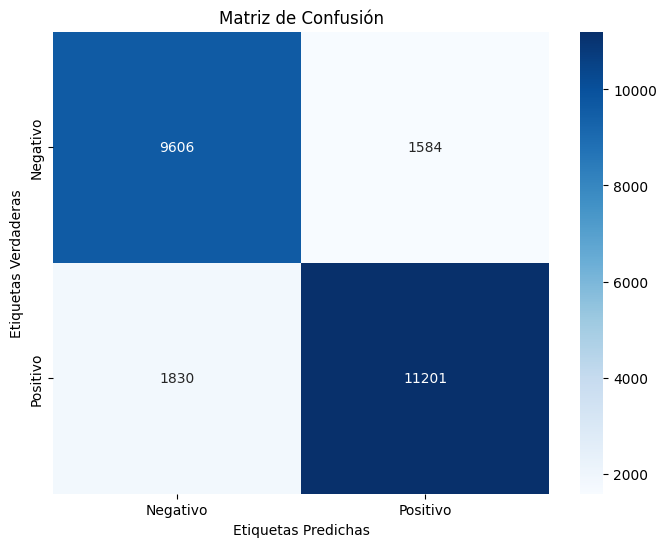

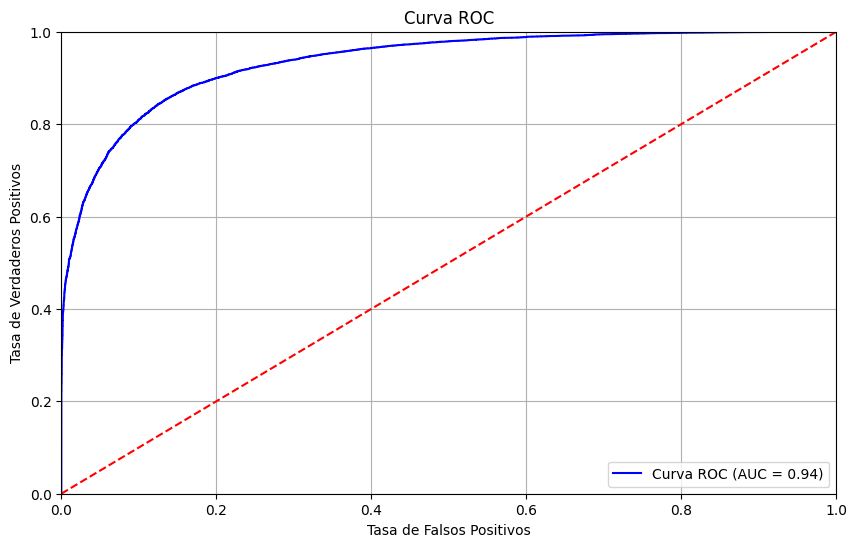

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Obtener las predicciones en el conjunto de test
predictions = model.predict(X_test_def)

# Para clasificación binaria, obtener las clases predichas
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Asumimos un umbral de 0.5

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicted_classes)

# Calcular métricas
report = classification_report(y_test, predicted_classes)

# Calcular el ROC AUC
roc_auc = roc_auc_score(y_test, predictions.flatten())  # Usar el array 1D de probabilidades

# Calcular FPR y TPR para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions.flatten())

# Imprimir resultados
print("Clasificación:")
print(report)
print(f"ROC AUC: {roc_auc:.2f}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Negativo', 'Positivo'],
             yticklabels=['Negativo', 'Positivo'])
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.title('Matriz de Confusión')
plt.show()

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

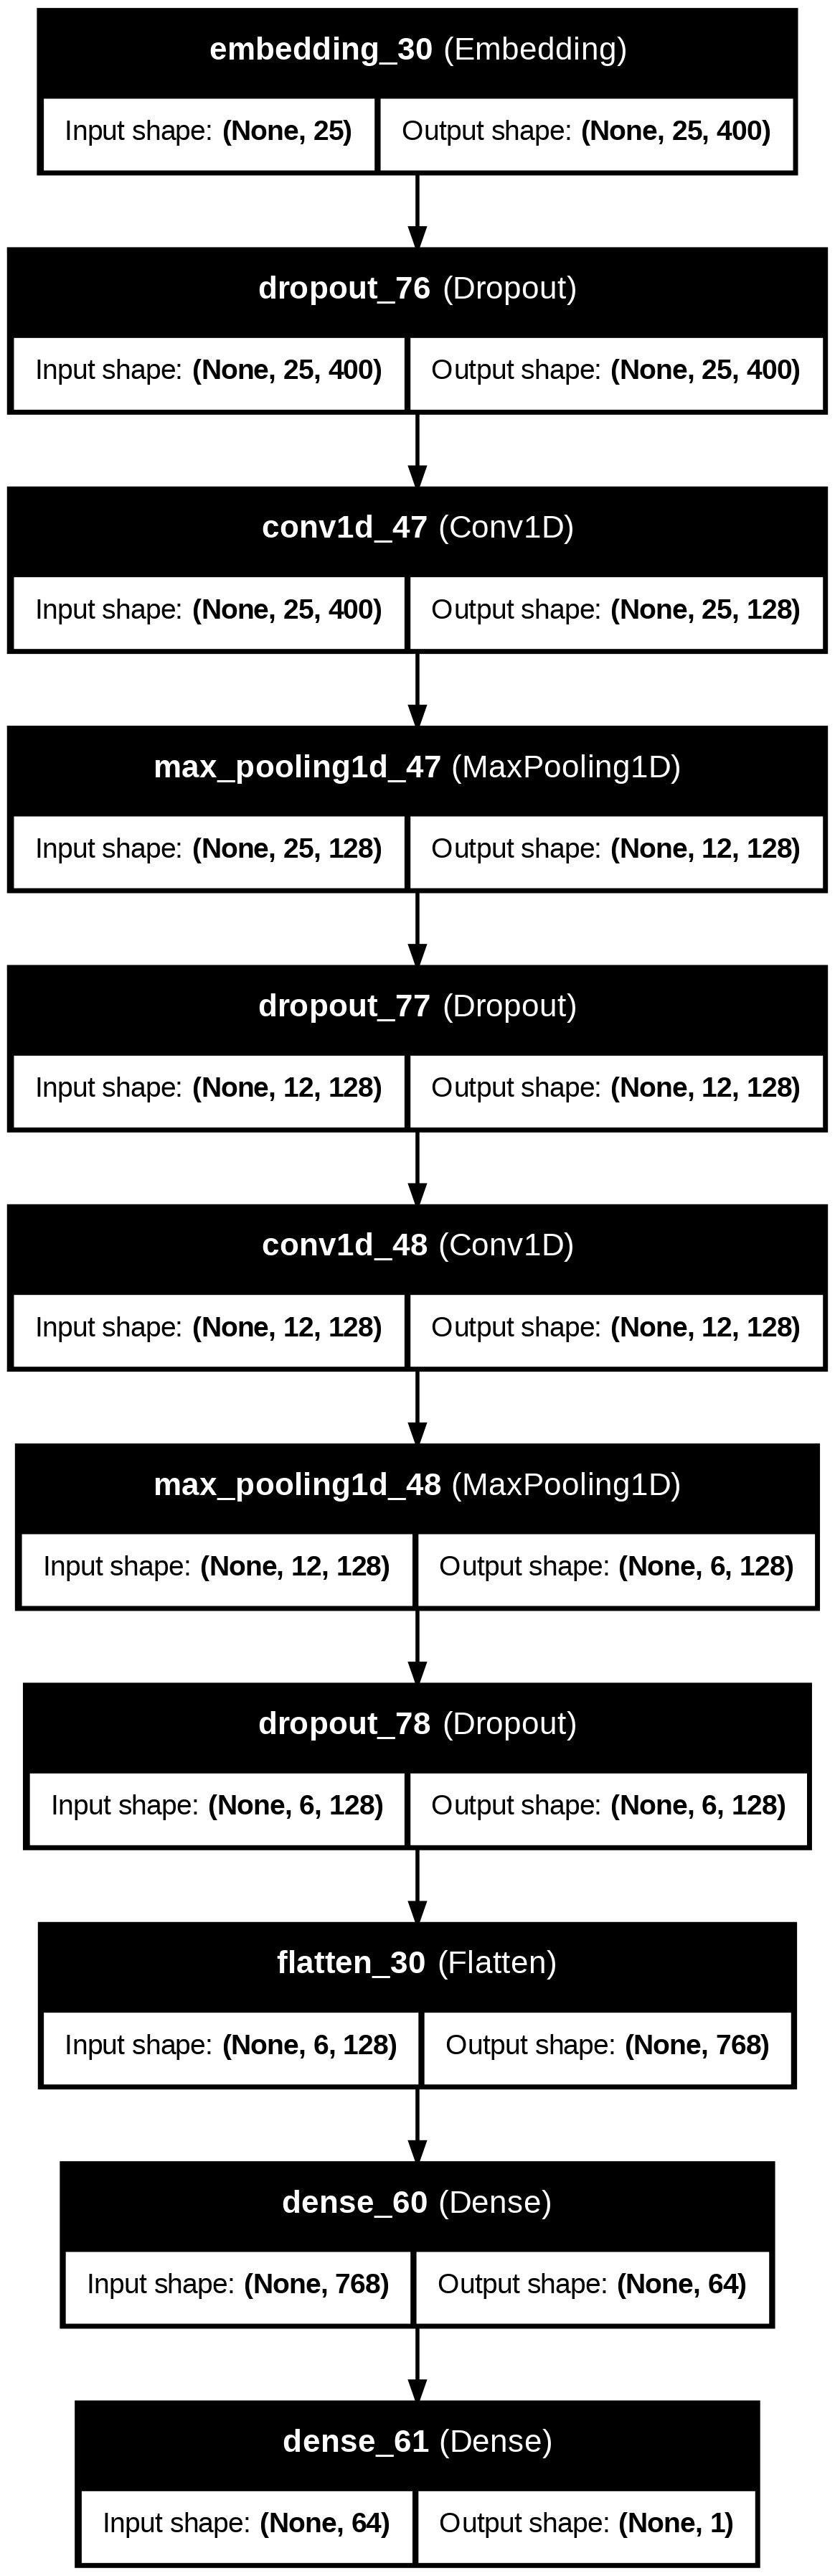

In [ ]:
!pip install pydot graphviz
from keras.utils import plot_model

# Supongamos que tu modelo se llama 'model'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ (None, 25, 400)             │      18,395,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 25, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_47 (Conv1D)                   │ (None, 25, 128)             │         153,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_47 (MaxPooling1D)      │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_48 (Conv1D)                   │ (None, 12, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_48 (MaxPooling1D)      │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,250,773 (73.44 MB)

 Trainable params: 285,057 (1.09 MB)

 Non-trainable params: 18,395,600 (70.17 MB)

 Optimizer params: 570,116 (2.17 MB)

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.7140 - loss: 0.5308 - val_accuracy: 0.8225 - val_loss: 0.3880
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8148 - loss: 0.4018 - val_accuracy: 0.8358 - val_loss: 0.3649
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8294 - loss: 0.3726 - val_accuracy: 0.8444 - val_loss: 0.3511
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8386 - loss: 0.3572 - val_accuracy: 0.8492 - val_loss: 0.3423
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8470 - loss: 0.3412 - val_accuracy: 0.8500 - val_loss: 0.3395
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8505 - loss: 0.3311 - val_accuracy: 0.8507 - val_loss: 0.3374
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8585 - loss: 0.3232 - val_accuracy: 0.8516 - val_loss: 0.3345
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8648 - loss: 0.309

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8516 - loss: 0.3310
Pérdida en el conjunto de test: 0.333321213722229
Precisión en el conjunto de test: 0.8510796427726746


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6961 - loss: 0.5555 - val_accuracy: 0.8235 - val_loss: 0.3951
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8079 - loss: 0.4123 - val_accuracy: 0.8375 - val_loss: 0.3709
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8224 - loss: 0.3860 - val_accuracy: 0.8418 - val_loss: 0.3579
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8321 - loss: 0.3731 - val_accuracy: 0.8461 - val_loss: 0.3514
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8396 - loss: 0.3591 - val_accuracy: 0.8453 - val_loss: 0.3483
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8407 - loss: 0.3525 - val_accuracy: 0.8469 - val_loss: 0.3438
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8487 - loss: 0.3432 - val_accuracy: 0.8483 - val_loss: 0.3417
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8497 - loss: 0.33

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3306
Pérdida en el conjunto de test: 0.33371371030807495
Precisión en el conjunto de test: 0.8523182272911072
